In [8]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Collect the data

recall_statistics_pickle_file = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/quality_measures/precision_recall/pickle_files/recall_scores_deposited_locscale.pkl"
recall_stats = pd.read_pickle(recall_statistics_pickle_file)

In [3]:

filtered_results = [x for x in recall_stats if x is not None]
recall_metrics_mb_locscale_map = [x["mb_locscale_recall"] for x in filtered_results if x["mb_locscale_recall"] is not None]
recall_metrics_mf_locscale_map = [x["mf_locscale_recall"] for x in filtered_results if x["mf_locscale_recall"] is not None]
recall_metrics_hybrid_locscale_map = [x["hybrid_locscale_recall"] for x in filtered_results if x["hybrid_locscale_recall"] is not None]
recall_metrics_deposited_map = [x["emmernet_MB_recall"] for x in filtered_results if x["emmernet_MB_recall"] is not None]
recall_metrics_emmernet_hybrid_map = [x["emmernet_hybrid_recall"] for x in filtered_results if x["emmernet_hybrid_recall"] is not None]
recall_metrics_emmernet_MB_map = [x["emmernet_MB_recall"] for x in filtered_results if x["emmernet_MB_recall"] is not None]



KeyError: 'emmernet_MB_recall'

In [4]:
def calculate_significance(data_1, data_2):
    """
    Calculates the significance of the difference between the mean of the list of data and the mean of the first element of the list of data
    """
    from scipy.stats import permutation_test
    def statistic(data1, data2):
        return np.mean(data1) - np.mean(data2)
    n_resamples = 10000

    permutation_test_result = permutation_test((data_1, data_2), statistic=statistic, n_resamples=n_resamples)
    
    pvalue = permutation_test_result.pvalue
    stars = ""
    if pvalue < 0.001:
        stars = "***"
    elif pvalue < 0.01:
        stars = "**"
    elif pvalue < 0.05:
        stars = "*"
    else:
        stars = "ns"
    if pvalue < 0.05:
        print("Significant difference")
        print("pvalue: ", pvalue)
        print("stars: ", stars)
    else:
        print("Not significant difference")
        print("pvalue: ", pvalue)
        print("stars: ", stars)
    return pvalue

In [5]:
# Perform permutation tests to determine if the recall metrics are significantly different from each other
# Do it for all combinations of recall metrics

from scipy.stats import permutation_test
def statistic(data1, data2):
    return np.mean(data1) - np.mean(data2)
n_resamples = 10000

# MB vs MF
mb_mf_permutation_test = permutation_test((recall_metrics_mb_locscale_map, recall_metrics_mf_locscale_map), statistic=statistic, n_resamples=n_resamples)
# MB vs Hybrid
mb_hybrid_permutation_test = permutation_test((recall_metrics_mb_locscale_map, recall_metrics_hybrid_locscale_map), statistic=statistic, n_resamples=n_resamples)
# MF vs Hybrid
mf_hybrid_permutation_test = permutation_test((recall_metrics_mf_locscale_map, recall_metrics_hybrid_locscale_map),  statistic=statistic, n_resamples=n_resamples)
# Deposited vs MB
deposited_mb_permutation_test = permutation_test((recall_metrics_deposited_map, recall_metrics_mb_locscale_map),  statistic=statistic, n_resamples=n_resamples)
# Deposited vs MF
deposited_mf_permutation_test = permutation_test((recall_metrics_deposited_map, recall_metrics_mf_locscale_map),  statistic=statistic, n_resamples=n_resamples)
# Deposited vs Hybrid
deposited_hybrid_permutation_test = permutation_test((recall_metrics_deposited_map, recall_metrics_hybrid_locscale_map),  statistic=statistic, n_resamples=n_resamples)
# Emmernet hybrid vs MB
emmernet_hybrid_mb_permutation_test = permutation_test((recall_metrics_emmernet_hybrid_map, recall_metrics_emmernet_MB_map),  statistic=statistic, n_resamples=n_resamples)


print(f"Recall metrics permutation test results:")
# Show the permutation test results as a table
p_significance = 0.05
mb_mf_significant = mb_mf_permutation_test.pvalue < p_significance
mb_hybrid_significant = mb_hybrid_permutation_test.pvalue < p_significance
mf_hybrid_significant = mf_hybrid_permutation_test.pvalue < p_significance
deposited_mb_significant = deposited_mb_permutation_test.pvalue < p_significance
deposited_mf_significant = deposited_mf_permutation_test.pvalue < p_significance
deposited_hybrid_significant = deposited_hybrid_permutation_test.pvalue < p_significance
emmernet_hybrid_mb_significant = emmernet_hybrid_mb_permutation_test.pvalue < p_significance

# Table 1
print(f"MB vs MF: {mb_mf_permutation_test.pvalue} \t significant: {mb_mf_significant} \t N={len(recall_metrics_mb_locscale_map)} \t num_resamples={n_resamples}")
print(f"MB vs Hybrid: {mb_hybrid_permutation_test.pvalue} \t significant: {mb_hybrid_significant} \t N={len(recall_metrics_mb_locscale_map)} \t num_resamples={n_resamples}")
print(f"MF vs Hybrid: {mf_hybrid_permutation_test.pvalue} \t significant: {mf_hybrid_significant} \t N={len(recall_metrics_mb_locscale_map)} \t num_resamples={n_resamples}")
print(f"Deposited vs MB: {deposited_mb_permutation_test.pvalue} \t significant: {deposited_mb_significant} \t N={len(recall_metrics_mb_locscale_map)} \t num_resamples={n_resamples}")
print(f"Deposited vs MF: {deposited_mf_permutation_test.pvalue} \t significant: {deposited_mf_significant} \t N={len(recall_metrics_mb_locscale_map)} \t num_resamples={n_resamples}")
print(f"Deposited vs Hybrid: {deposited_hybrid_permutation_test.pvalue}\t significant: {deposited_hybrid_significant} \t N={len(recall_metrics_mb_locscale_map)} \t num_resamples={n_resamples}")
print(f"Emmernet hybrid vs MB: {emmernet_hybrid_mb_permutation_test.pvalue} \t significant: {emmernet_hybrid_mb_significant} \t N={len(recall_metrics_mb_locscale_map)} \t num_resamples={n_resamples}")



ImportError: cannot import name 'permutation_test' from 'scipy.stats' (/home/abharadwaj1/miniconda3/envs/locscale_dev/lib/python3.7/site-packages/scipy/stats/__init__.py)

In [16]:
def pretty_violinplots(list_of_series, xticks, ylabel,xlabel=None, figsize_cm=(14,8),\
                        fontscale=3,font="Helvetica",linewidth=2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import cm
    import matplotlib as mpl
    ## Function not generic
    mpl.rcParams['pdf.fonttype'] = 42

    figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54)
    fig, ax = plt.subplots(figsize=figsize)

    sns.set_theme(context="paper", font=font, font_scale=fontscale)
    sns.set_style("white")
    sns.violinplot(data=list_of_series, scale_hue=False, ax=ax, legend=False, inner="stick")
    #sns.swarmplot(data=list_of_series, color="black", size=4, ax=ax, alpha=0.2)
    # draw a line at median 
    # for i, series in enumerate(list_of_series):
    #     median = np.median(series)
    #     ax.plot([i-0.1, i+0.1], [median, median], color="black", linewidth=linewidth)
    ax.set_xticklabels(xticks, rotation=45, ha="right")
    ax.set_ylabel(ylabel)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    
    plt.tight_layout()
    return fig

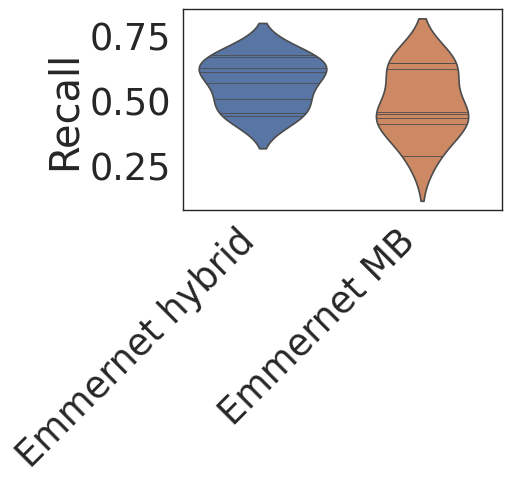

In [17]:
data = [recall_metrics_emmernet_hybrid_map, recall_metrics_emmernet_MB_map]
ylabel = "Recall"
xticks = ["Emmernet hybrid", "Emmernet MB"]
fig = pretty_violinplots(data, xticks, ylabel, figsize_cm=(14,14), fontscale=3, font="Helvetica", linewidth=2)
fig.savefig("recall_violinplot_emmernet_hybrid_MB.pdf", dpi=600, bbox_inches="tight")

In [3]:
for i in range(8):
    print(round(100/8 * (i+1),2))

12.5
25.0
37.5
50.0
62.5
75.0
87.5
100.0


In [6]:
# permutation test for the recall metrics 